<a href="https://colab.research.google.com/github/Murad-pitafi/Machine-Learning/blob/main/Copy_of_murad_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
bill = pd.read_csv('/content/electricity_bill_dataset.csv')
bill.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


<ipython-input-4-a06b26e13061>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bill.corr(), annot = True)


<Axes: >

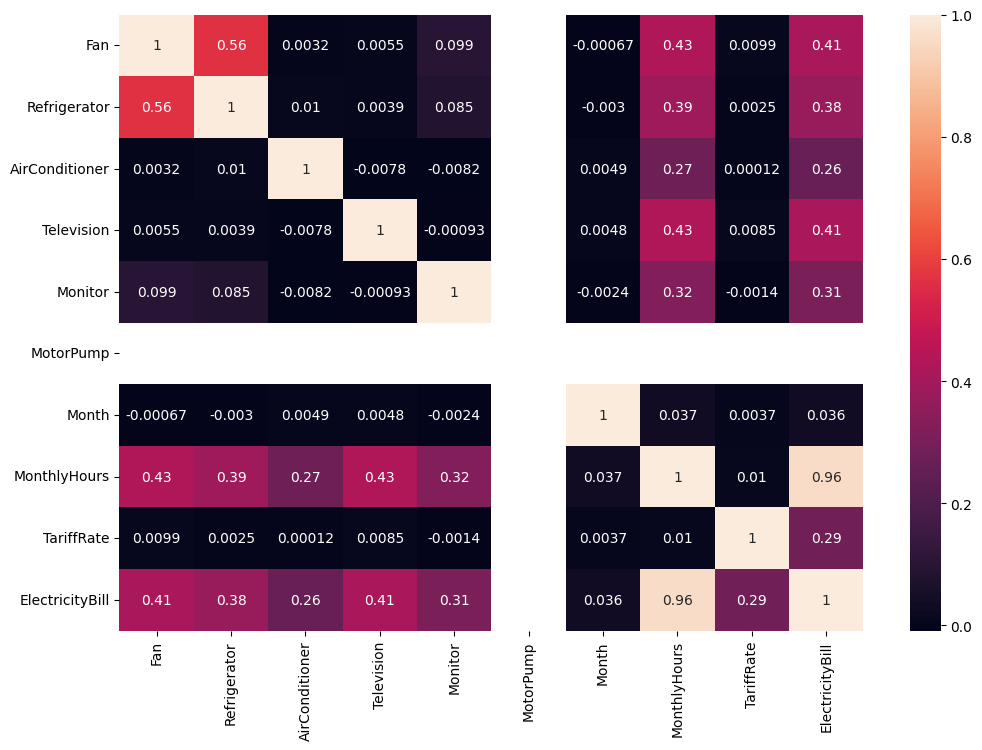

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.heatmap(bill.corr(), annot = True)

In [ ]:
bill.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


<Figure size 1200x800 with 0 Axes>

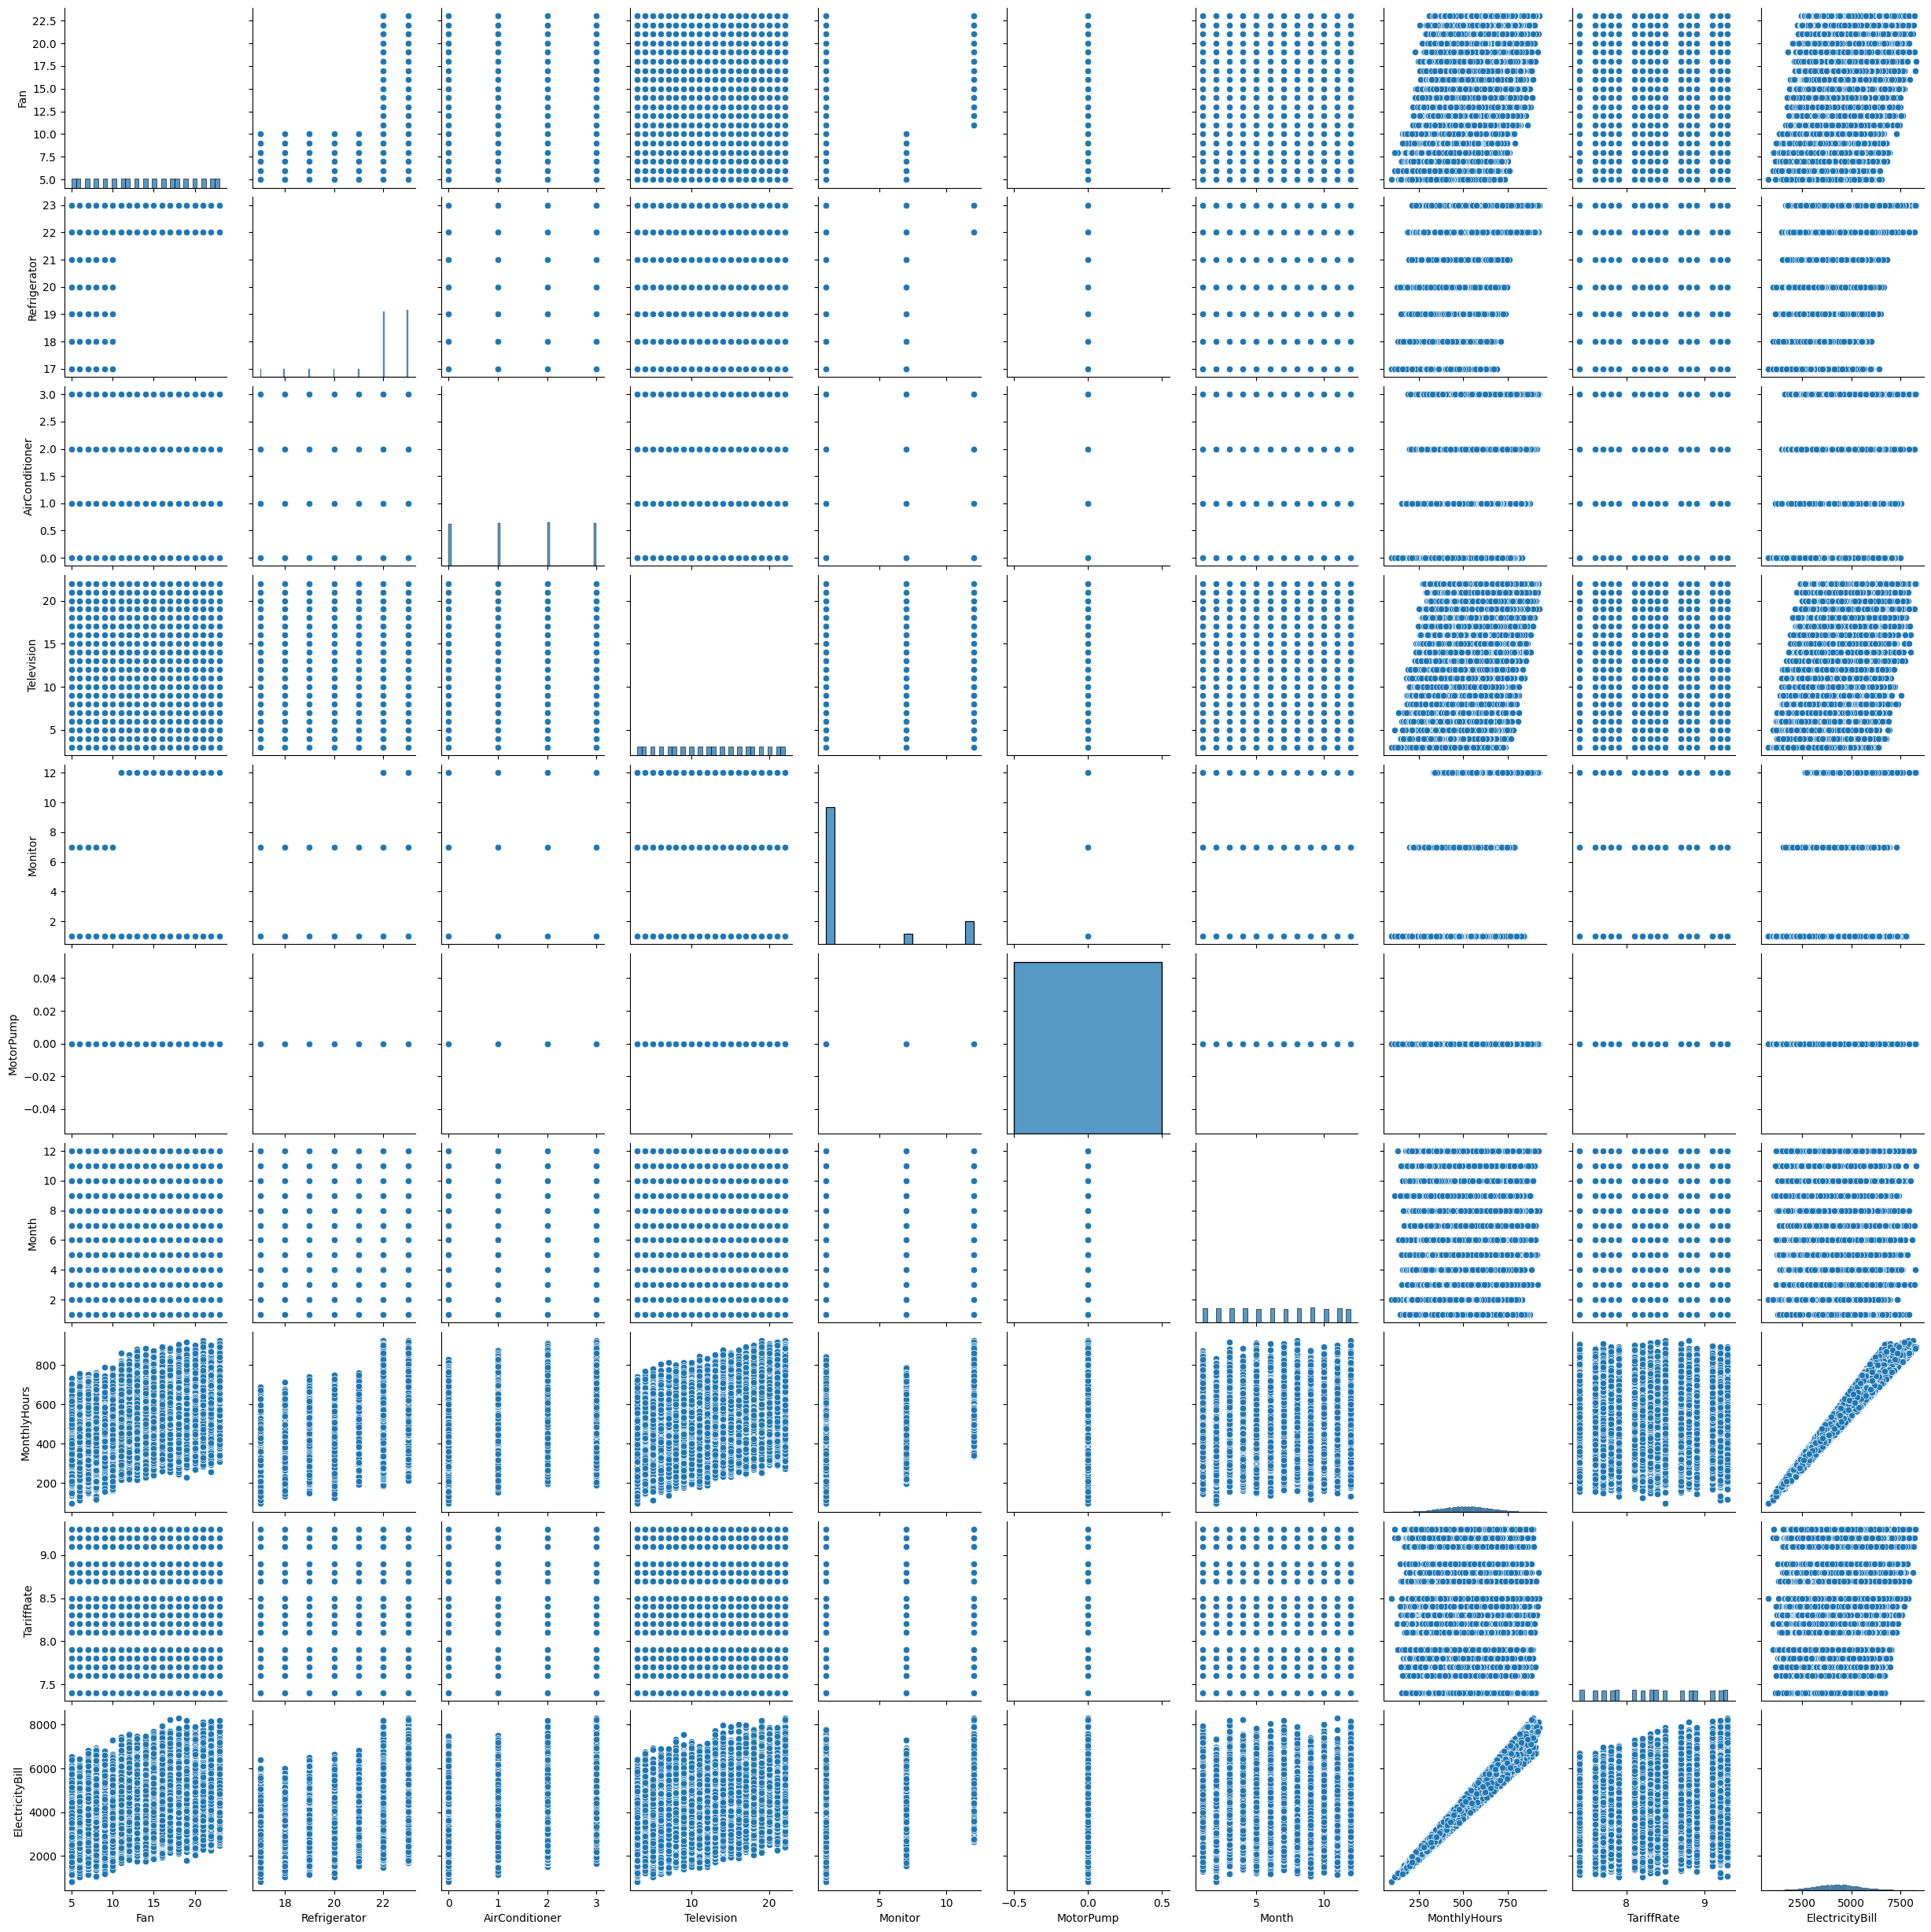

In [ ]:
plt.figure(figsize = (12,8))
sns.pairplot(bill)

This graph shows that here bottom we can see graph of Fan with respect to ElectricityBill it is not making a linear straght line , we do conclude if data is linear or not if graph shows data distribution in linear way like it is shown in graph monthlyHours respect with electricity it is straight line making but here other graphs are not in linear way so we do conclude there is ony one feature which is linearly distributed others are not so using linear regression model is not best option here  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = bill.drop(['ElectricityBill', 'Company', 'City'], axis = 1)
y = bill['ElectricityBill']
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size= 0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)
pred = reg.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(pred,ytest)
print("root mean error square ", math.sqrt(mse))

root mean error square  70.49629910886934


Root mean error square is quite high , it is becaause of descrepancy

<Axes: xlabel='ElectricityBill'>

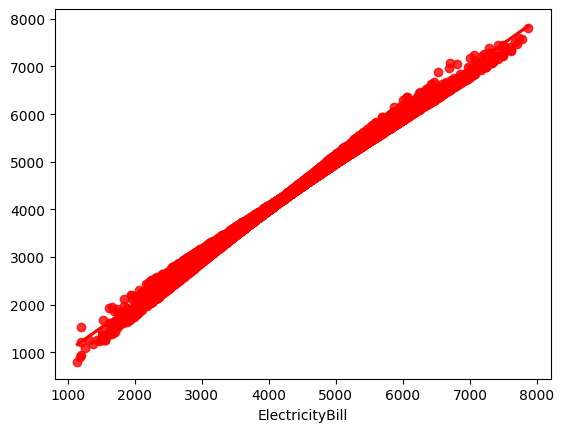

In [ ]:
sns.regplot( x = ytest , y = pred, ci = None, color = 'Red')

regplot is method in which it maps actual points and predicted points and shows whether data is linearly predicted or not if actual points were far away we could have concluded that our linear model is not best for it since we can get view by graph that our best fit model line is closest with actual points so data is linear and our assumption regarding our linear model is prety okay

In [ ]:
# import numpy as np
# residual = np.array(x).value - pred

In [ ]:
from sklearn.metrics import r2_score
print('test accuracy ', round(r2_score(ytest, pred)))


test accuracy  1


In [ ]:
dic = {'Actual': ytest, 'Predict': pred}

In [ ]:
data = pd.DataFrame(dic)
data

,Actual,Predict
19060,5054.7,5034.977800
17874,3809.2,3856.275930
44423,3245.3,3234.683744
36865,5728.8,5725.512541
36537,4148.0,4152.398598
...,...,...
4998,3973.8,3995.578339
41440,4761.5,4750.071788
6898,5032.3,5089.426622
43685,4672.9,4677.189343


In [ ]:
data['Difference'] = data['Actual'] - data['Predict']
data

,Actual,Predict,Difference
19060,5054.7,5034.977800,19.722200
17874,3809.2,3856.275930,-47.075930
44423,3245.3,3234.683744,10.616256
36865,5728.8,5725.512541,3.287459
36537,4148.0,4152.398598,-4.398598
...,...,...,...
4998,3973.8,3995.578339,-21.778339
41440,4761.5,4750.071788,11.428212
6898,5032.3,5089.426622,-57.126622
43685,4672.9,4677.189343,-4.289343


In [1]:
import pandas as pd



# @title task 1

car = pd.read_csv("/content/CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
dcateg = []
numeric = []

for i in car.columns:
  if car[i].nunique() < 8:
    categ.append(i)
  else:
    numeric.append(i)

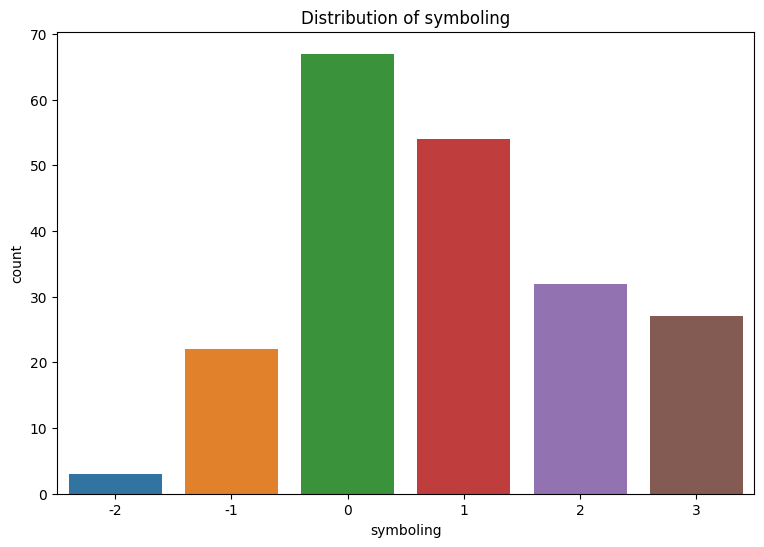

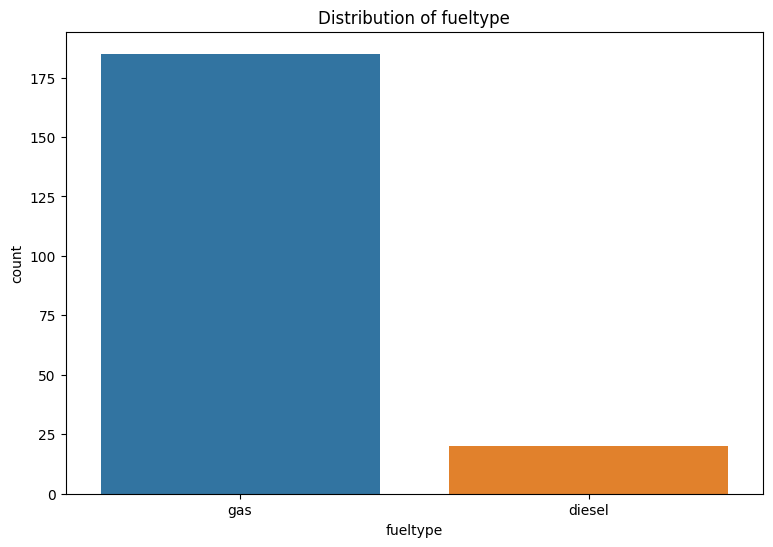

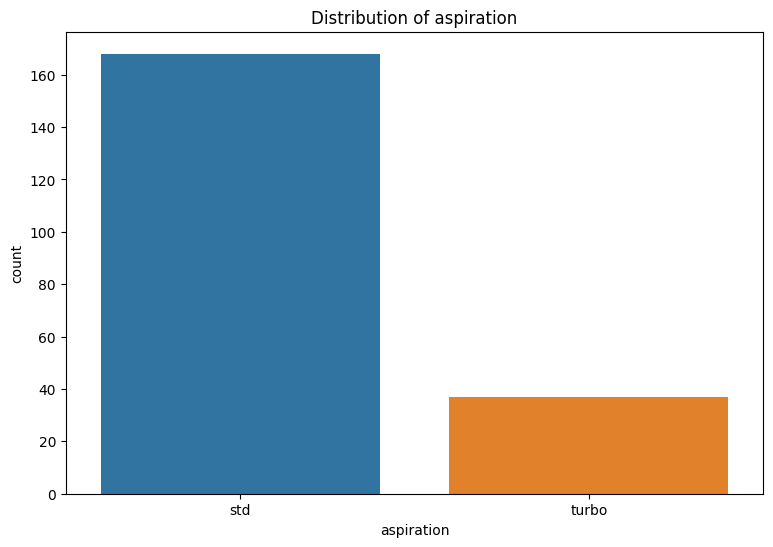

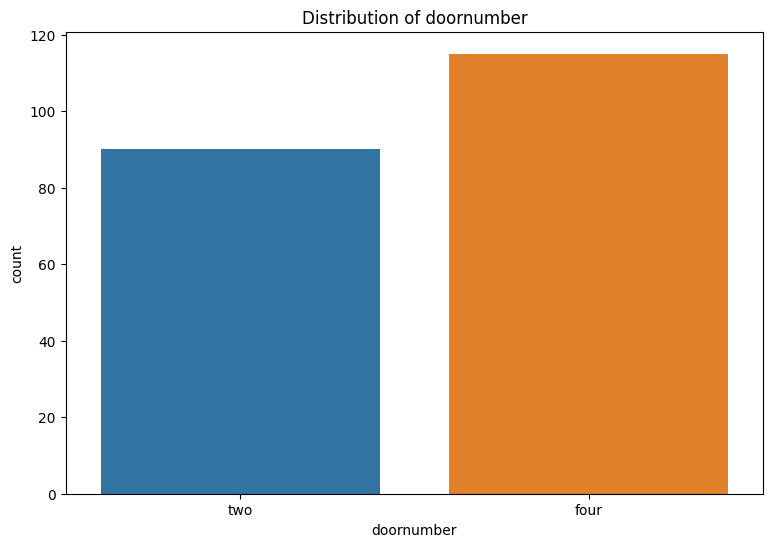

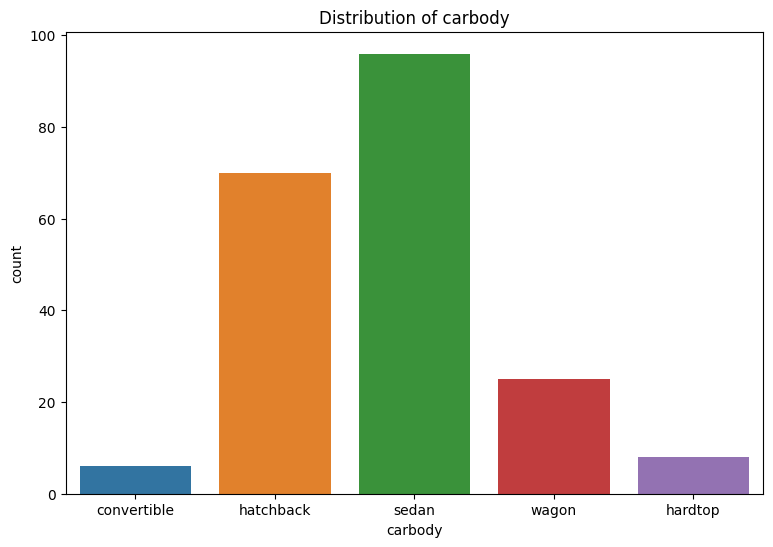

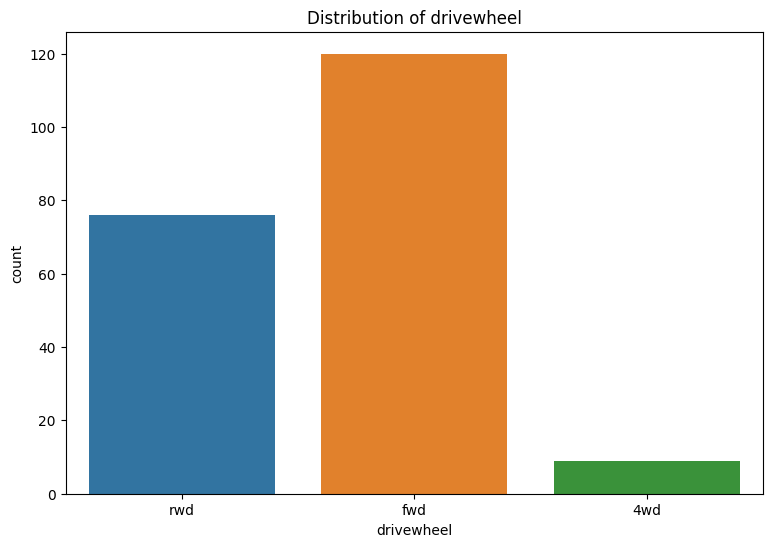

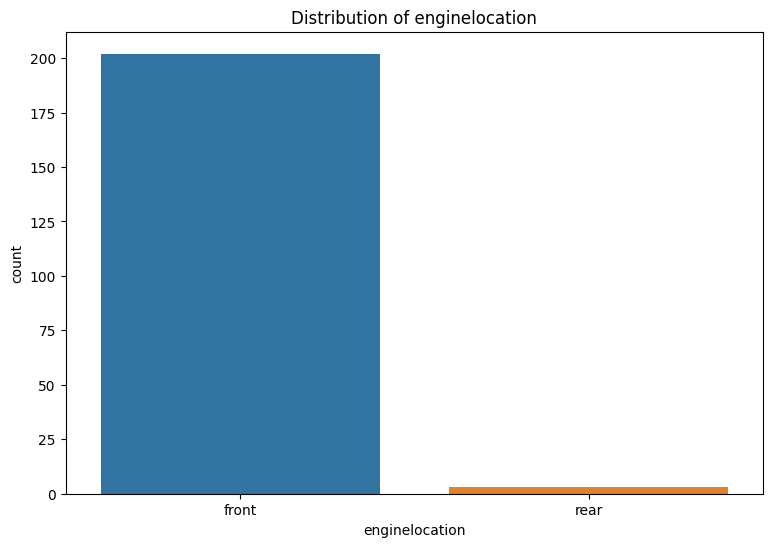

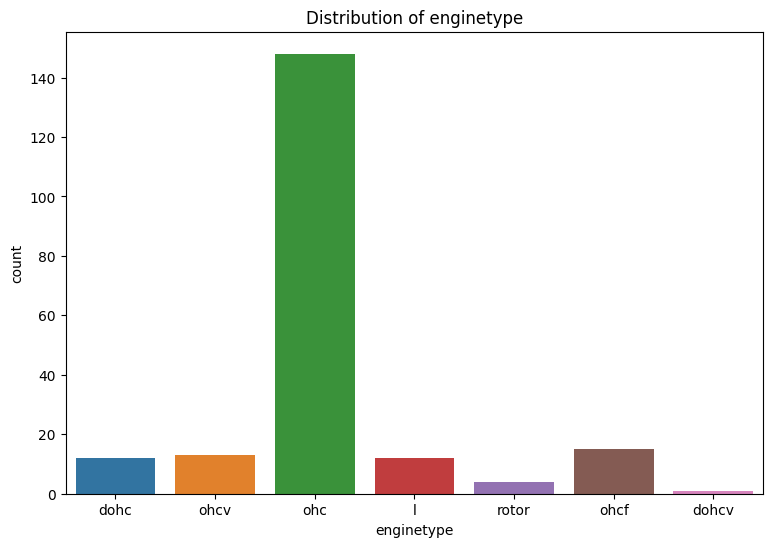

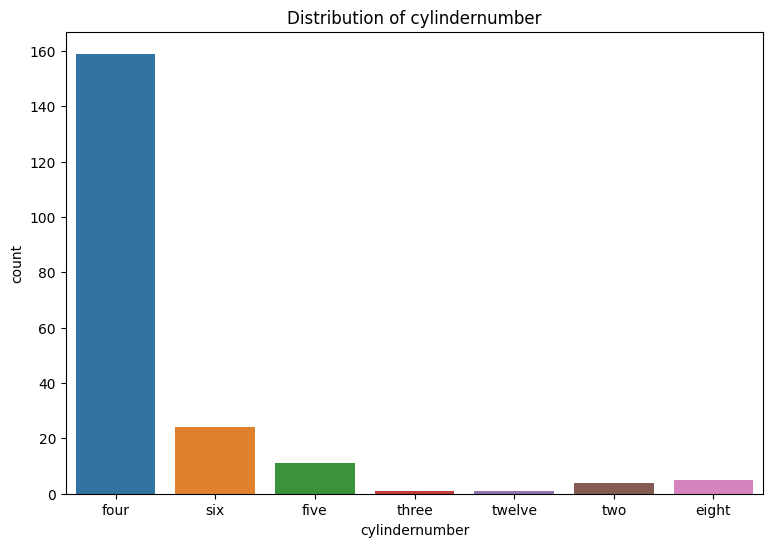

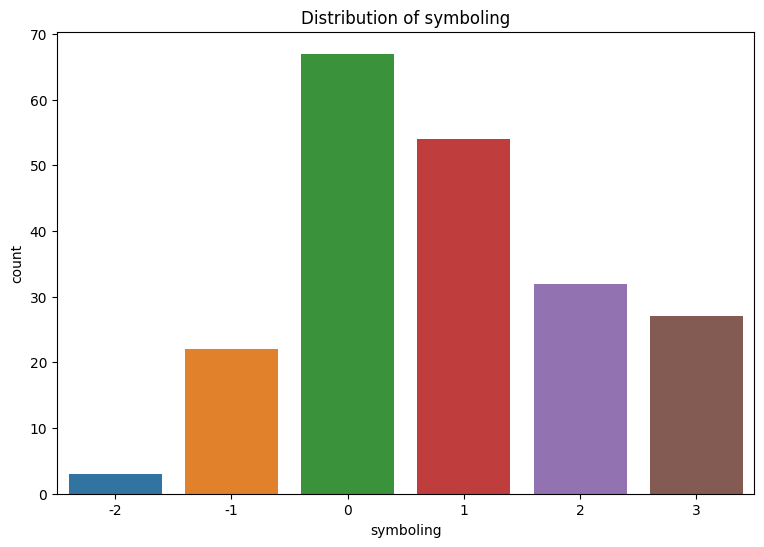

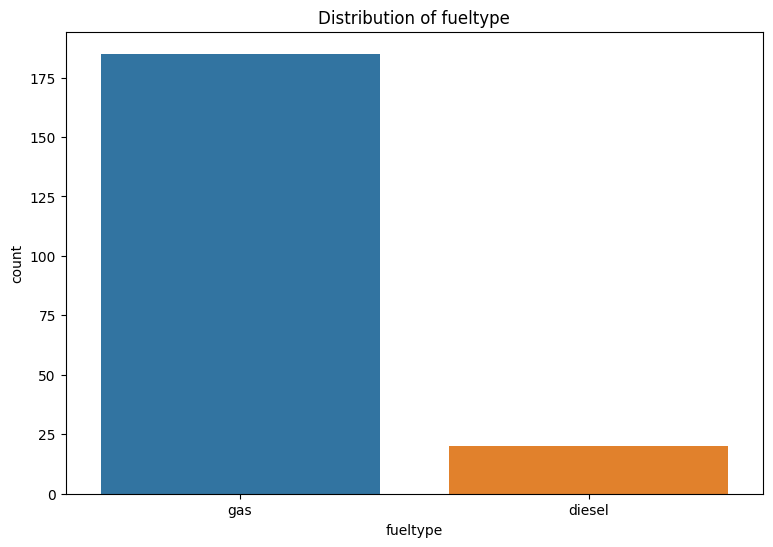

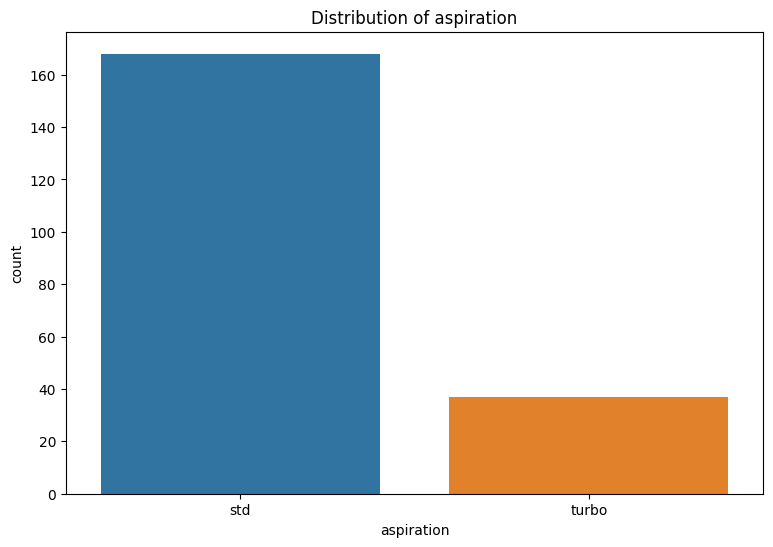

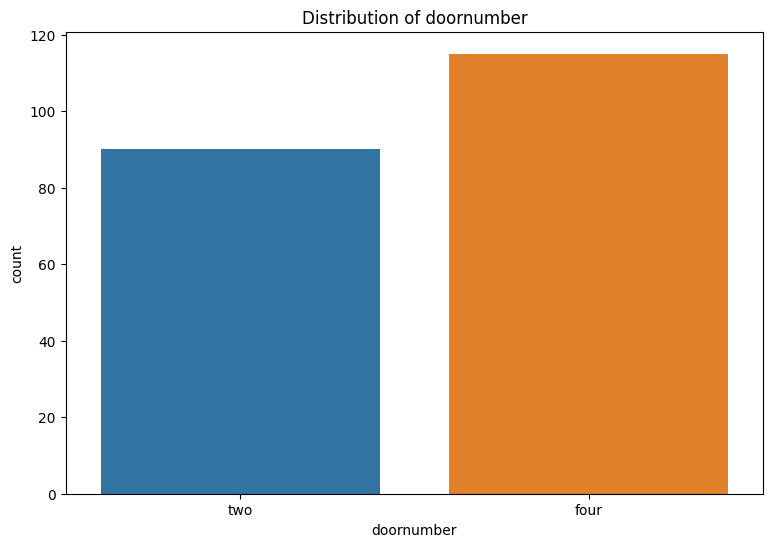

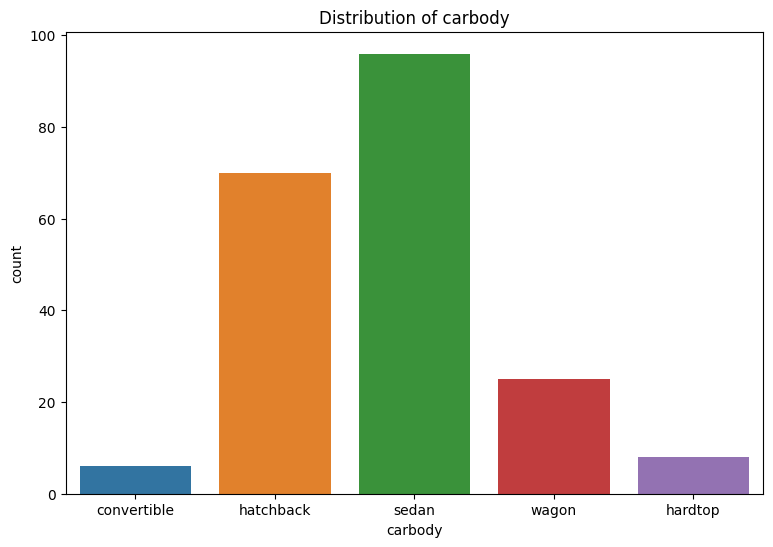

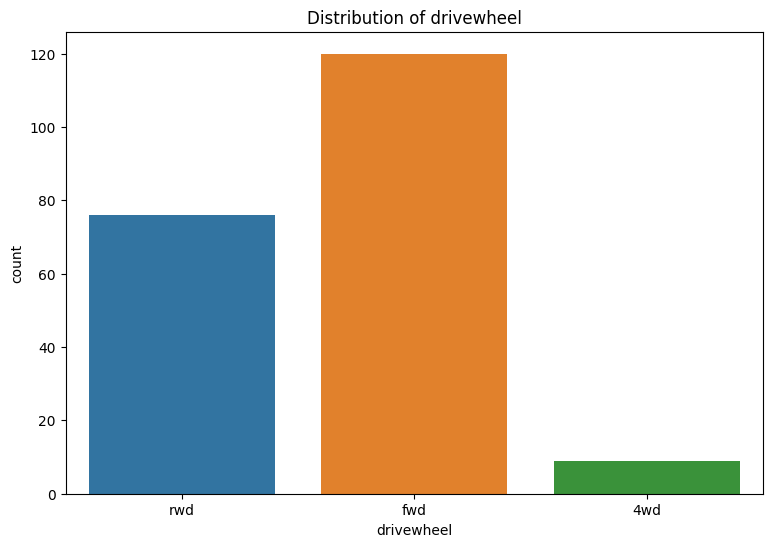

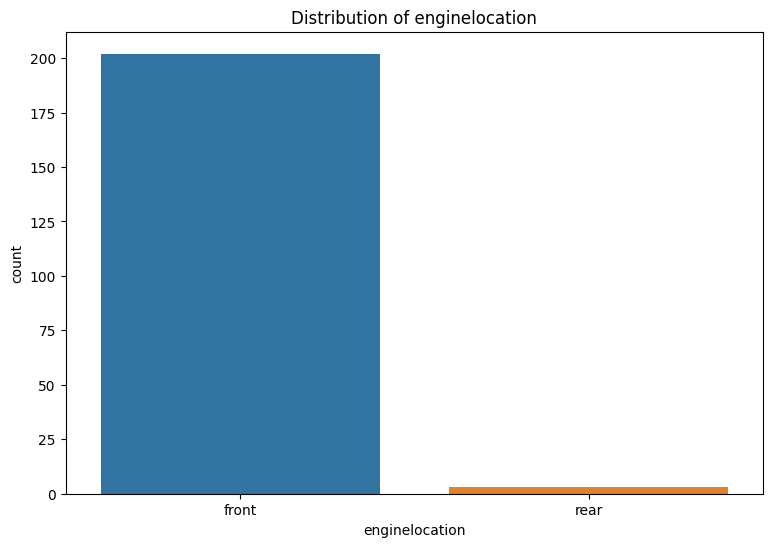

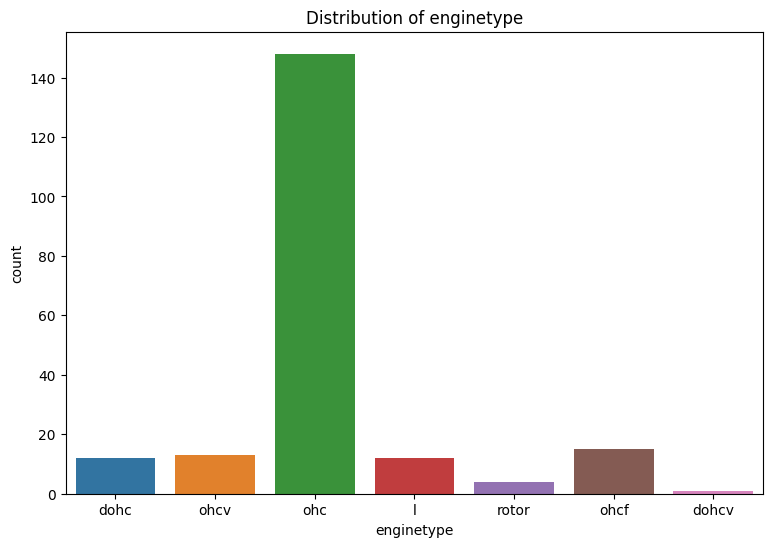

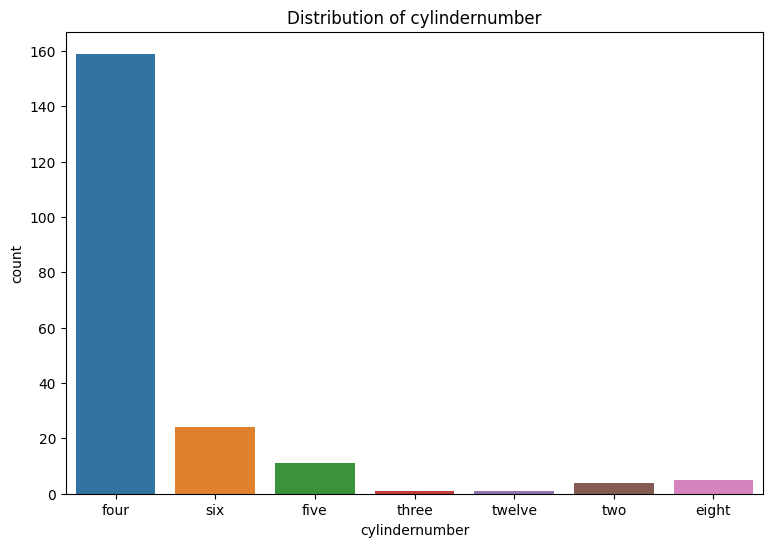

In [8]:
from seaborn.axisgrid import Grid
from seaborn.categorical import countplot
#categorical variable
import seaborn as sns
import matplotlib.pyplot as plt

for i in categ:
  plt.figure(figsize = (9, 6))
  plt.title(f'Distribution of {i}')
  sns.countplot(x = i , data = car)
  plt.show()

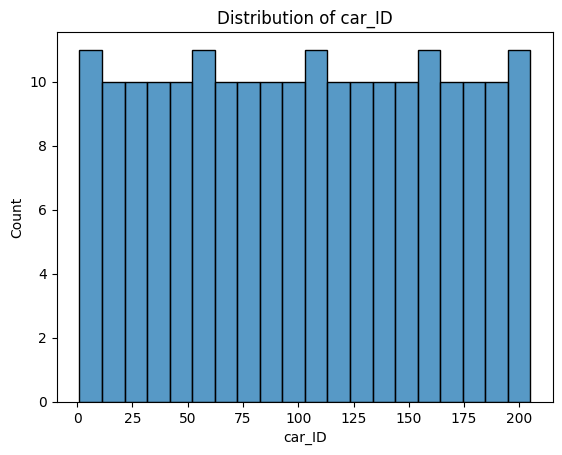

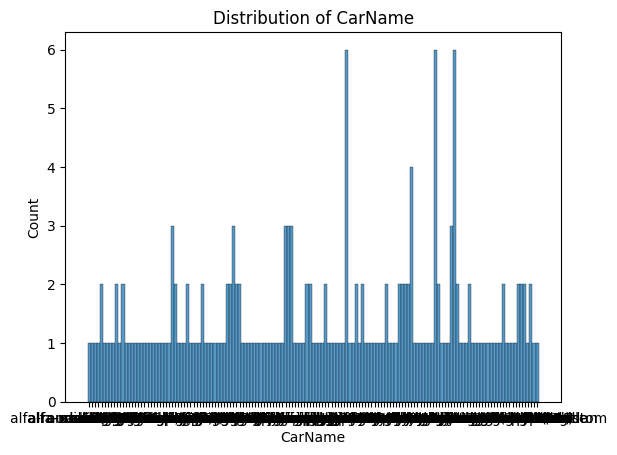

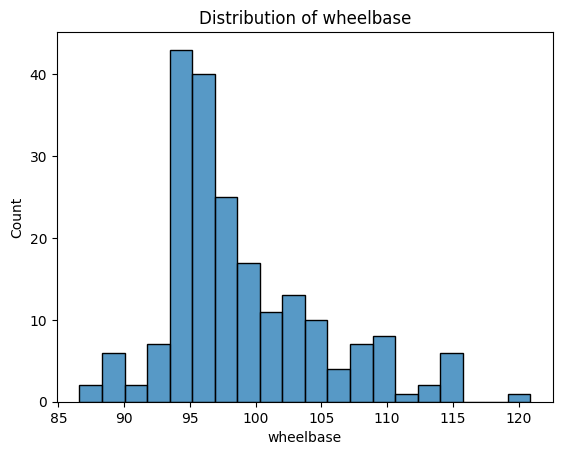

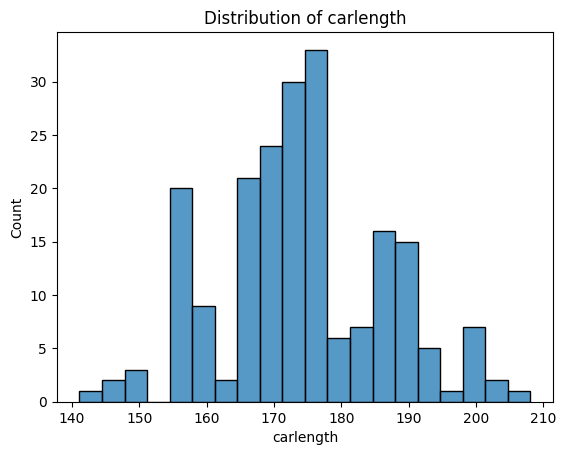

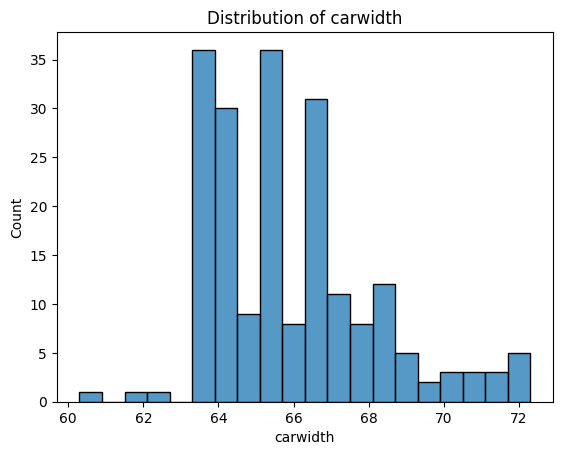

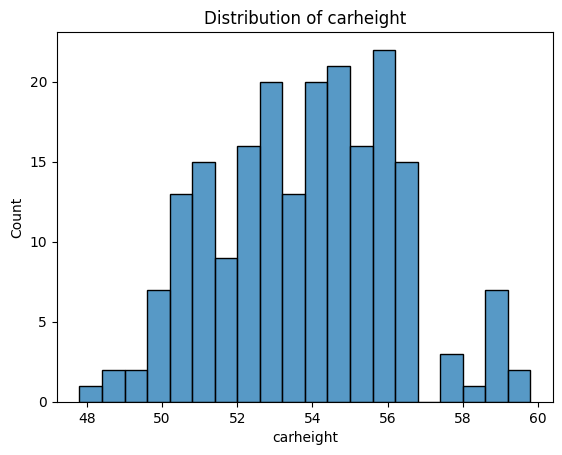

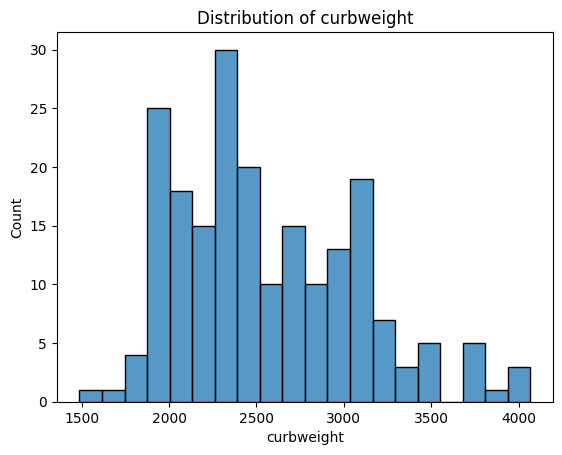

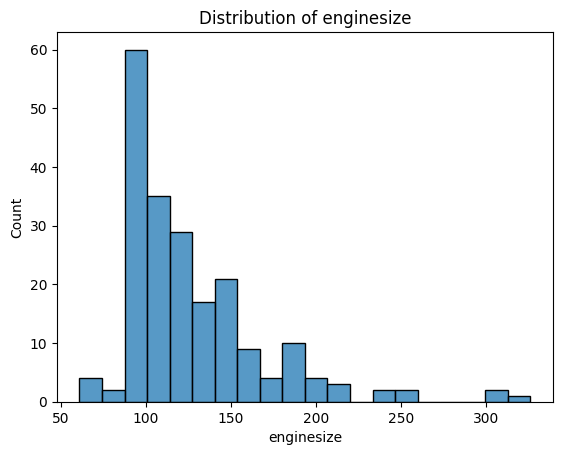

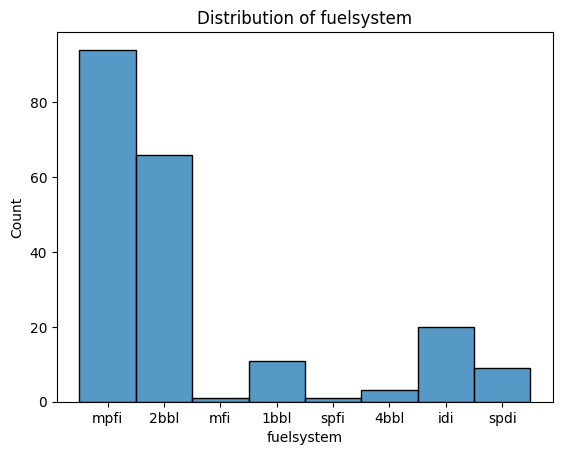

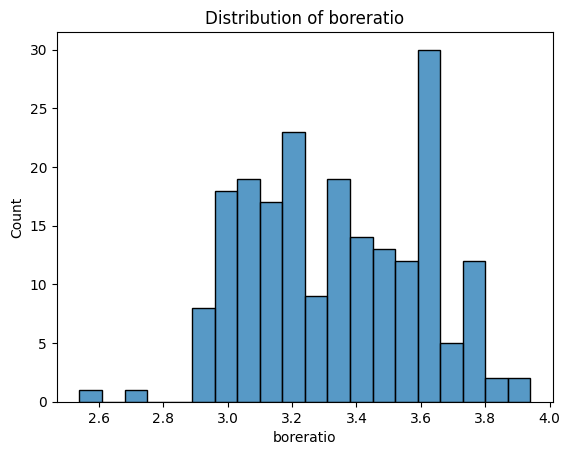

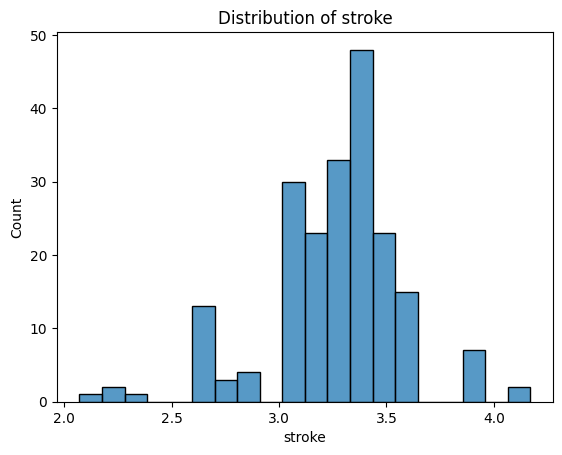

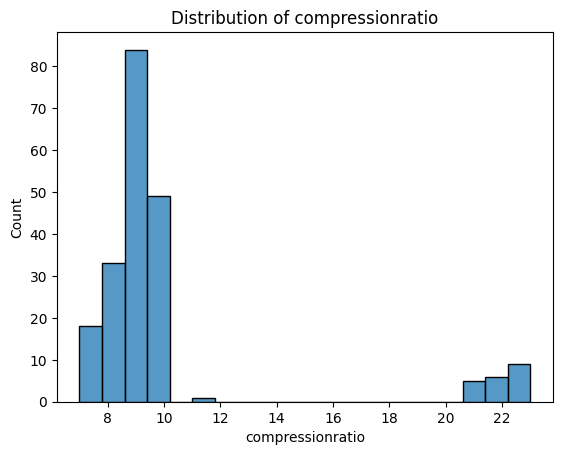

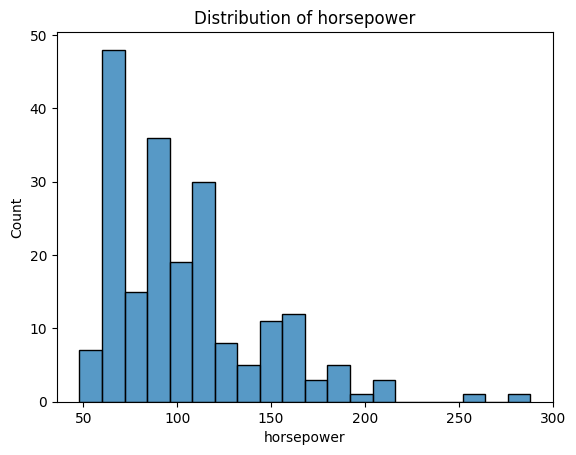

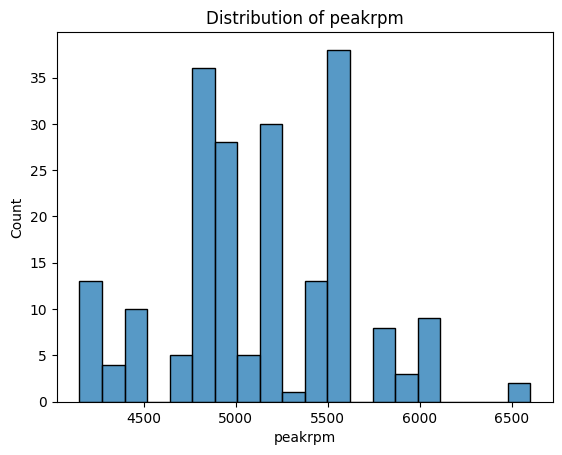

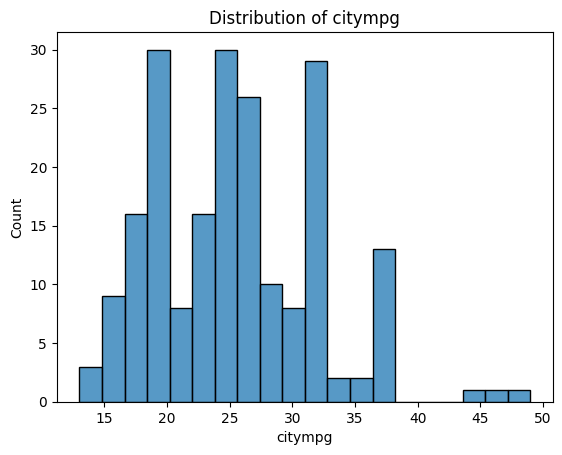

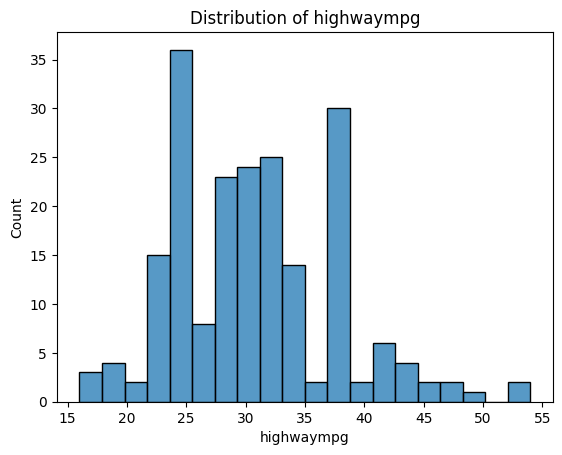

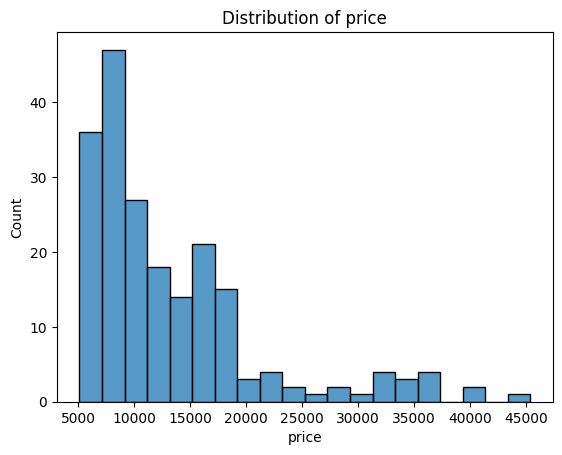

In [9]:
for i in numeric:
  plt.title(f'Distribution of {i}')
  sns.histplot(x = i , data = car , bins = 20 )
  plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in categ:
  car[i] = encoder.fit_transform(car[[i]])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [12]:
car.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
car.duplicated().sum()

0

<ipython-input-16-ae11a946d095>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(), annot = True)


<Axes: >

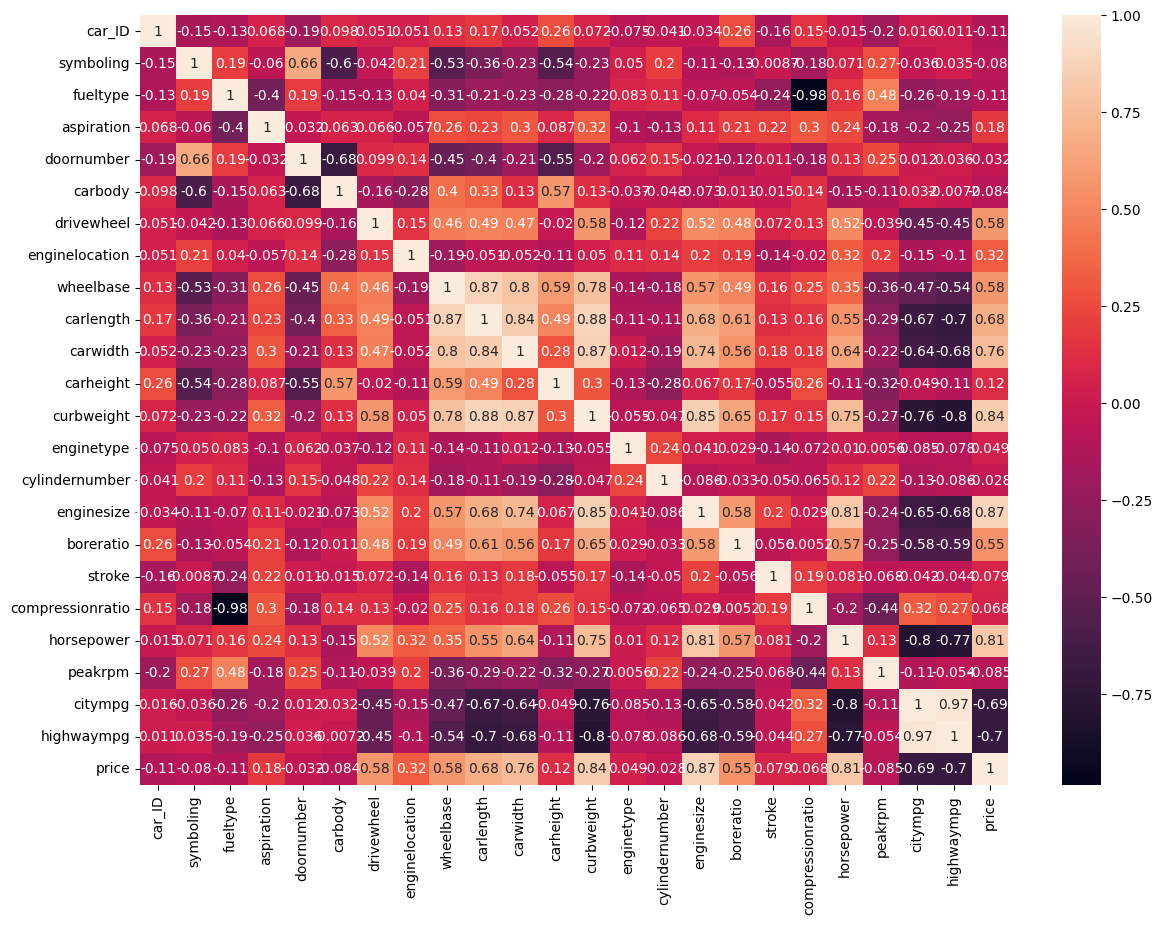

In [16]:
plt.figure(figsize = (14,10))
sns.heatmap(car.corr(), annot = True)

In [25]:
car['CarName'] = encoder.fit_transform(car[['CarName']])
car['fuelsystem'] = encoder.fit_transform(car[['fuelsystem']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [29]:

from sklearn.model_selection import train_test_split
x = car.drop(['car_ID', 'price', 'CarName'], axis = 1)
y = car['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)


In [30]:
X_train_fs, X_test_fs, fs = select_features(xtrain, ytrain, xtest)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.034044
Feature 1: 1.149242
Feature 2: 2.887923
Feature 3: 0.267340
Feature 4: 3.178509
Feature 5: 70.097185
Feature 6: 23.085690
Feature 7: 43.951231
Feature 8: 91.103355
Feature 9: 162.710277
Feature 10: 1.186321
Feature 11: 282.240680
Feature 12: 1.153116
Feature 13: 0.012890
Feature 14: 454.376242
Feature 15: 54.933456
Feature 16: 48.418159
Feature 17: 0.043345
Feature 18: 0.562357
Feature 19: 257.379426
Feature 20: 0.089927
Feature 21: 123.493293
Feature 22: 125.703574


In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
print(reg.score(xtrain,ytrain))
print(reg.score(xtest,ytest))

0.9047512491187905
0.7951314042219708


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ypred = reg.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred)


r2 = r2_score(ytest, ypred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 score: {r2:.2f}")


MSE: 11575385.80
RMSE: 3402.26
MAE: 2335.07
R2 score: 0.80


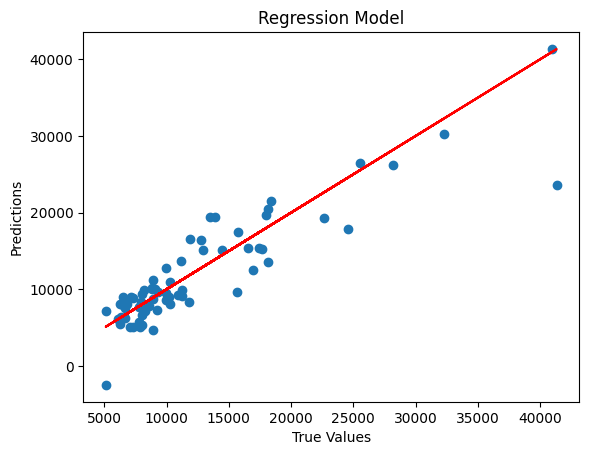

In [35]:

plt.scatter(ytest, ypred)
plt.plot(ytest, ytest, color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Model')

plt.show()


**Task3**

**K-Nearest Neighbors (KNN)**: KNN is a non-parametric algorithm that makes no assumptions about the underlying data distribution. However, it assumes that the data is **normalized** and that the **distance metric** used is appropriate for the data. It also assumes that the **value of K** is appropriate for the data and that the **training set** is **representative** of the population ³.

**Decision Trees (DT)**: DT is a non-parametric algorithm that makes no assumptions about the underlying data distribution. However, it assumes that the data is independent, that the attributes used in the tree are relevant to the classification task, and that the tree depth is appropriate for the data. It also assumes that the training set is representative of the population ¹.

**Ensemble Learning**: Ensemble learning is a technique that combines multiple models to improve the accuracy of predictions. The assumptions of ensemble learning depend on the type of models used. For example, if the ensemble consists of decision trees, then the assumptions of decision trees apply. Similarly, if the ensemble consists of logistic regression models, then the assumptions of logistic regression apply .

**Logistic Regression**: Logistic regression is a parametric algorithm that assumes that the response variable is binary and that the observations are independent of each other. It also assumes that there is no multicollinearity among the explanatory variables, that there are no extreme outliers or influential observations in the dataset, and that the error terms are independent and identically distributed. Finally, it assumes that the linear relationship between the explanatory variables and the log odds of the response variable is appropriate.
